# E-commerce Transitions Data

## Data structure and columns type
- This data set contains transactions occurring in an online store (E-commerce).
- Out of the 12,330 customer samples in the dataset, 84.5% (10,422) were negative class samples (i.e. customers who did not end up buying the product), and the rest (1908) were positive class samples (i.e. customers who ended up buying).
- The dataset consists of 10 numerical and 8 categorical attributes.
- The 'Revenue' attribute can be used as the class label.
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
Bounce Rate: The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
Exit Rate: The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
- Page Value: The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
- Special Day: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Data cleaning and visulization

In [1]:
# dependencies and setup
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# defining data path
data_path=Path('Resources/Raw_data/coding_round_data.csv')
# Reading data source using pandas
ecommerce_df=pd.read_csv(data_path)

In [3]:
#looking for ecommerce_df dataframe
ecommerce_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# columns of ecommerce_df dataframe
ecommerce_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
# Shape of ecommerce_df datafrmae
shape=ecommerce_df.shape
print(f'The number of rows are: {shape[0]}, number of columns are: {shape[1]}')

The number of rows are: 12330, number of columns are: 18


In [6]:
#info of the dataframe
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# checking null value in the dataframe
ecommerce_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# looking for statistical terms(transpose for better visulization)
ecommerce_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
# looking value counts for columns
ecommerce_df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [10]:
ecommerce_df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

## Looking at categorical value counts for binning

In [11]:
# seperating categorical columns
columns=['SpecialDay','Month','OperatingSystems','Browser', 'Region', 'TrafficType',
             'VisitorType','Weekend', 'Revenue']
ecommerce_df_cat=ecommerce_df[columns]
ecommerce_df_cat

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...
12325,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [12]:
# looking values for categorical columns
for cat in ecommerce_df_cat.columns:
    print(f'For columns {cat}')
    print('*'*35)
    categories=ecommerce_df_cat[cat].value_counts()
    print(categories)
    print()

For columns SpecialDay
***********************************
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

For columns Month
***********************************
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

For columns OperatingSystems
***********************************
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

For columns Browser
***********************************
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

For columns Region
***********************************
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

For columns TrafficType
************

Graph for SpecialDay column: Total = 6


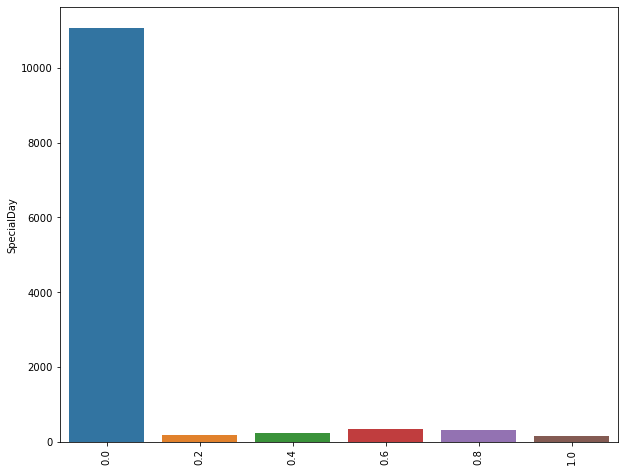

Graph for Month column: Total = 10


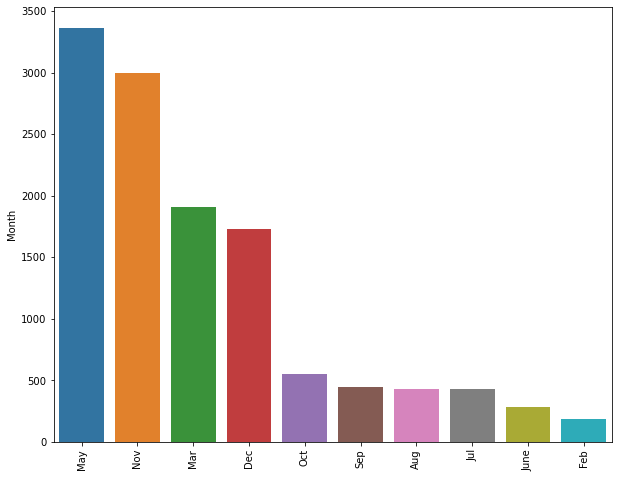

Graph for OperatingSystems column: Total = 8


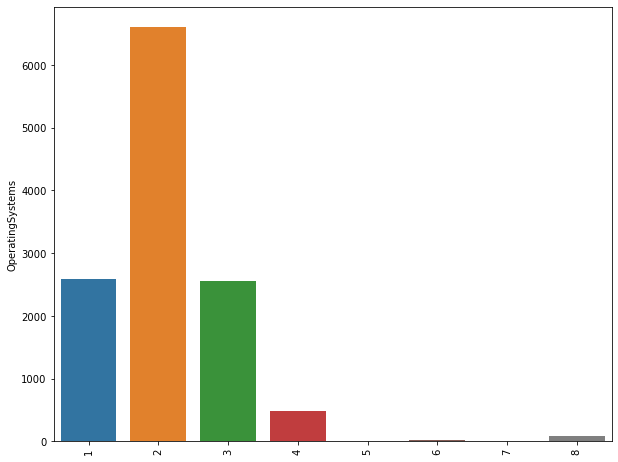

Graph for Browser column: Total = 13


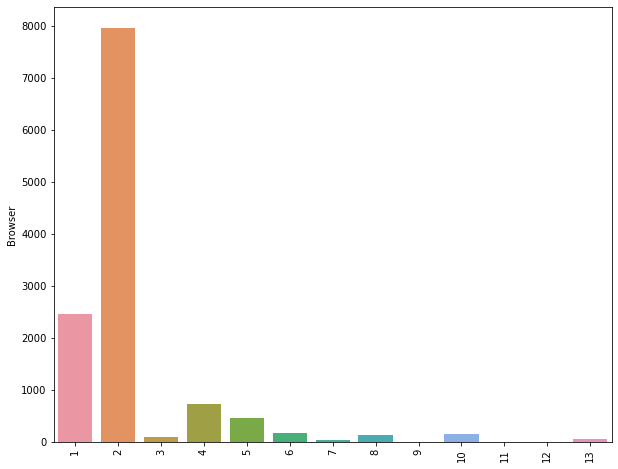

Graph for Region column: Total = 9


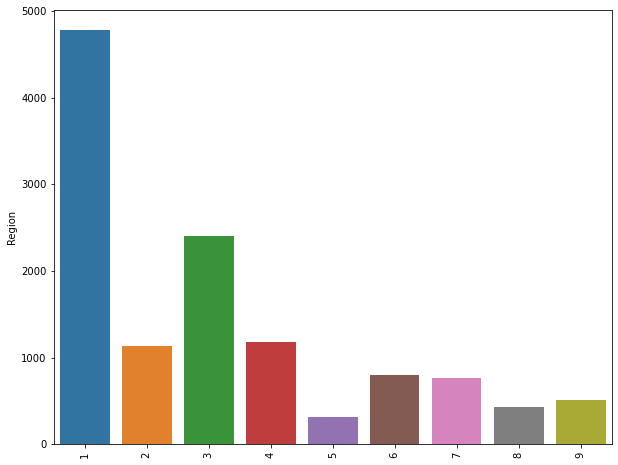

Graph for TrafficType column: Total = 20


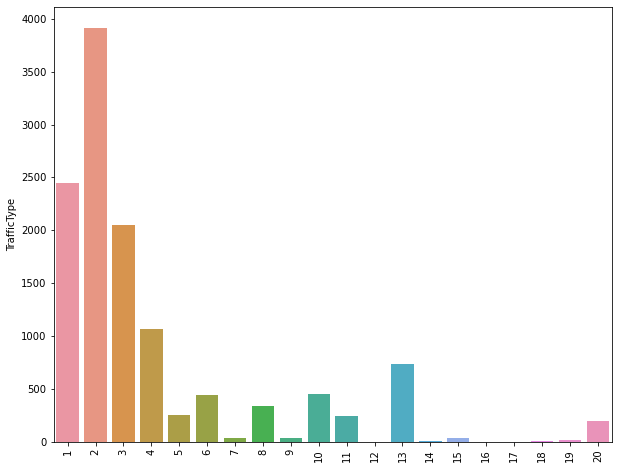

Graph for VisitorType column: Total = 3


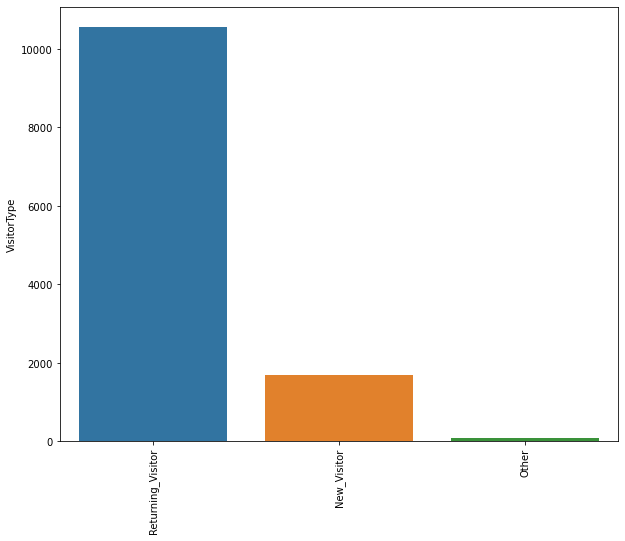

Graph for Weekend column: Total = 2


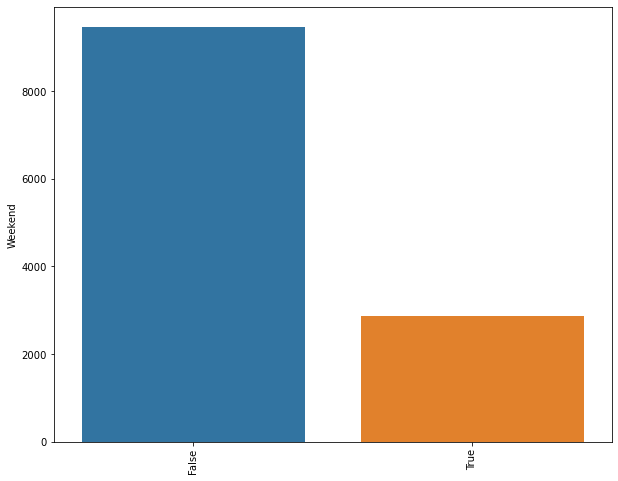

Graph for Revenue column: Total = 2


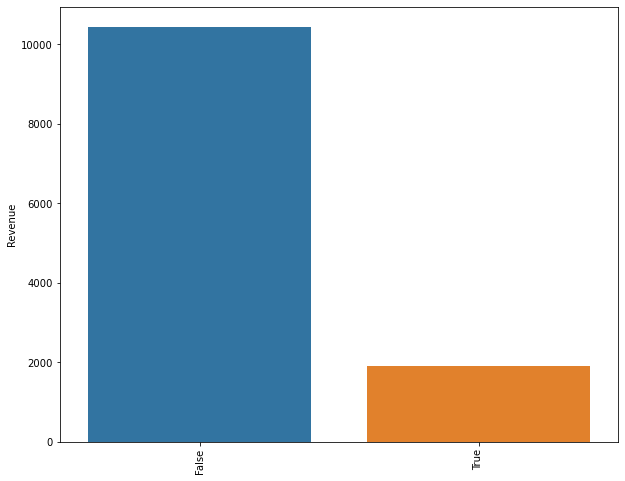

In [13]:
# plotting categorical columns
for cat in ecommerce_df_cat.columns:
    fig,ax=plt.subplots(figsize=(10,8))
    cat_num=ecommerce_df_cat[cat].value_counts()
    chart=sns.barplot(x=cat_num.index, y=cat_num, ax=ax)
    print('Graph for {} column: Total = {}'.format(cat, len(cat_num)))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Choosing a cutoff value and replacing them with others

In [14]:
# selecting categorical columns
cat_columns=['Month','OperatingSystems','Browser', 'Region', 'TrafficType',
             'VisitorType','Weekend', 'Revenue']

In [15]:
list(ecommerce_df['OperatingSystems'].value_counts()
                                      .loc[lambda x : x<500].index)

[4, 8, 6, 7, 5]

In [16]:
#selecting a new copy of dataframe for binning
ecommerce_df_bin=ecommerce_df.copy()

In [17]:
# Choosing a cutoff value and create a list of OperatingSystems to be replaced
to_replace=list(ecommerce_df_bin['OperatingSystems'].value_counts()
                                      .loc[lambda x : x<500].index)

# Replace in dataframe
for os in to_replace:
    ecommerce_df_bin['OperatingSystems'] = ecommerce_df_bin['OperatingSystems'].replace(os,"Other")

# Check to make sure binning was successful
ecommerce_df_bin['OperatingSystems'].value_counts()

2        6601
1        2585
3        2555
Other     589
Name: OperatingSystems, dtype: int64

In [18]:
# Choosing a cutoff value and create a list of traffic type to be replaced
to_replace1=list(ecommerce_df_bin['TrafficType'].value_counts()
                                      .loc[lambda x : x<200].index)

# Replace in dataframe
for traffic in to_replace1:
    ecommerce_df_bin['TrafficType'] = ecommerce_df_bin['TrafficType'].replace(traffic,"Other")

# Check to make sure binning was successful
ecommerce_df_bin['TrafficType'].value_counts()

2        3913
1        2451
3        2052
4        1069
13        738
10        450
6         444
Other     363
8         343
5         260
11        247
Name: TrafficType, dtype: int64

In [19]:
# Choosing a cutoff value and create a list of browser to be replaced
to_replace2=list(ecommerce_df_bin['Browser'].value_counts()
                                      .loc[lambda x : x<150].index)

# Replace in dataframe
for browser in to_replace2:
    ecommerce_df_bin['Browser'] = ecommerce_df_bin['Browser'].replace(browser,"Other")

# Check to make sure binning was successful
ecommerce_df_bin['Browser'].value_counts()

2        7961
1        2462
4         736
5         467
Other     367
6         174
10        163
Name: Browser, dtype: int64

## Combining and removing related columns 

In [20]:
#combining related numerical columns to one
# defining a function for combining two columns
def avgDuration(c, d):
    if d == 0:
        result = 0
    else:
        result = float(d)/float(c)
    return result

In [21]:
ecommerce_df_comb=ecommerce_df_bin.copy()

In [22]:
# adding three new columns 
ecommerce_df_comb['Administrative_Avg']=ecommerce_df_comb.apply(lambda x: avgDuration(x['Administrative'], x['Administrative_Duration']), axis=1)
ecommerce_df_comb['Informational_Avg']=ecommerce_df_comb.apply(lambda x: avgDuration(x['Informational'], x['Informational_Duration']), axis=1)
ecommerce_df_comb['ProductRelated_Avg']=ecommerce_df_comb.apply(lambda x: avgDuration(x['ProductRelated'], x['ProductRelated_Duration']), axis=1)

In [23]:
# dropping 6 columns that we already combined
ecommerce_df_comb.drop(columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'], inplace=True)

In [24]:
#rearranging columns
ecommerce_final_df=ecommerce_df_comb[['Administrative_Avg', 'Informational_Avg',
       'ProductRelated_Avg','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']]

In [25]:
# looking for new database
ecommerce_final_df.head()

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,32.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,Feb,Other,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,1.333333,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,62.750000,0.02,0.05,0.0,0.0,Feb,3,Other,1,4,Returning_Visitor,True,False


In [26]:
ecommerce_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Administrative_Avg  12330 non-null  float64
 1   Informational_Avg   12330 non-null  float64
 2   ProductRelated_Avg  12330 non-null  float64
 3   BounceRates         12330 non-null  float64
 4   ExitRates           12330 non-null  float64
 5   PageValues          12330 non-null  float64
 6   SpecialDay          12330 non-null  float64
 7   Month               12330 non-null  object 
 8   OperatingSystems    12330 non-null  object 
 9   Browser             12330 non-null  object 
 10  Region              12330 non-null  int64  
 11  TrafficType         12330 non-null  object 
 12  VisitorType         12330 non-null  object 
 13  Weekend             12330 non-null  bool   
 14  Revenue             12330 non-null  bool   
dtypes: bool(2), float64(7), int64(1), object(5)
memory us

In [77]:
ecommerce_final_df.columns

Index(['Administrative_Avg', 'Informational_Avg', 'ProductRelated_Avg',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [72]:
#saving the data 
ecommerce_final_df.to_csv('Resources/Cleaned_data/all_data.csv', index=False)

In [76]:
#saving html table for website
ecommerce_final_df[:50].to_html("Resources/Cleaned_data/all_data.html")

In [27]:
#seperating  dataframe based on revenue False and True
false_rows = ecommerce_final_df[ecommerce_final_df['Revenue'] == False]
true_rows = ecommerce_final_df[ecommerce_final_df['Revenue'] == True]
false_rows

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,32.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Other,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,1.333333,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,62.750000,0.020000,0.050000,0.000000,0.0,Feb,3,Other,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,48.333333,0.0,33.656447,0.007143,0.029031,12.241717,0.0,Dec,Other,6,1,1,Returning_Visitor,True,False
12326,0.000000,0.0,93.150000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.000000,0.0,30.708333,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,18.750000,0.0,23.066667,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Undersampling — Deleting samples from the majority class.

In [28]:
#under sampling
df_under = pd.concat([false_rows.sample(n=len(true_rows), random_state=42), true_rows])
df_under = df_under.reset_index(drop=True)
df_under

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,44.541667,40.666667,53.708333,0.000000,0.018182,0.000000,0.0,Dec,2,2,2,1,Returning_Visitor,False,False
1,0.000000,0.000000,53.166667,0.000000,0.050000,0.000000,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
2,0.000000,0.000000,220.678571,0.014286,0.033333,0.000000,0.0,Dec,1,1,3,1,Returning_Visitor,False,False
3,5.666667,0.000000,24.086352,0.009524,0.040317,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
4,22.260000,0.000000,30.232723,0.000000,0.008337,17.634346,0.0,Nov,2,2,9,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,22.244444,0.000000,60.555587,0.002041,0.010884,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,True,True
3812,19.939286,0.000000,32.883333,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True
3813,0.000000,105.625000,32.135344,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
3814,21.479592,9.000000,51.723988,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


In [29]:
df_under['Revenue'].value_counts()

False    1908
True     1908
Name: Revenue, dtype: int64

In [30]:
#saving the data for modeling
df_under.to_csv('Resources/Cleaned_data/under_sampling_data.csv', index=False)

## Oversampling — Duplicating samples from the minority class

In [31]:
#over sampling
df_over=pd.concat([false_rows, true_rows.sample(n=len(false_rows), replace=True)])
df_over= df_over.reset_index(drop=True)
df_over

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,32.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Other,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,1.333333,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,62.750000,0.020000,0.050000,0.000000,0.0,Feb,3,Other,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,8.666667,24.0,67.199405,0.003390,0.014802,10.370424,0.0,Mar,2,2,1,1,Returning_Visitor,False,True
20840,24.750000,0.0,32.906792,0.005402,0.017331,0.000000,0.0,Nov,1,2,1,2,Returning_Visitor,False,True
20841,100.350000,0.0,34.921296,0.004762,0.012698,37.022630,0.0,Nov,2,2,3,3,Returning_Visitor,False,True
20842,21.625000,0.0,27.930238,0.000000,0.005319,18.953234,0.0,Mar,2,2,3,8,New_Visitor,True,True


In [32]:
df_over['Revenue'].value_counts()

False    10422
True     10422
Name: Revenue, dtype: int64

In [33]:
#saving the data for modeling
df_over.to_csv('Resources/Cleaned_data/over_sampling_data.csv', index=False)

## Data visulization

In [35]:
#correlation of all columns
corr=ecommerce_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


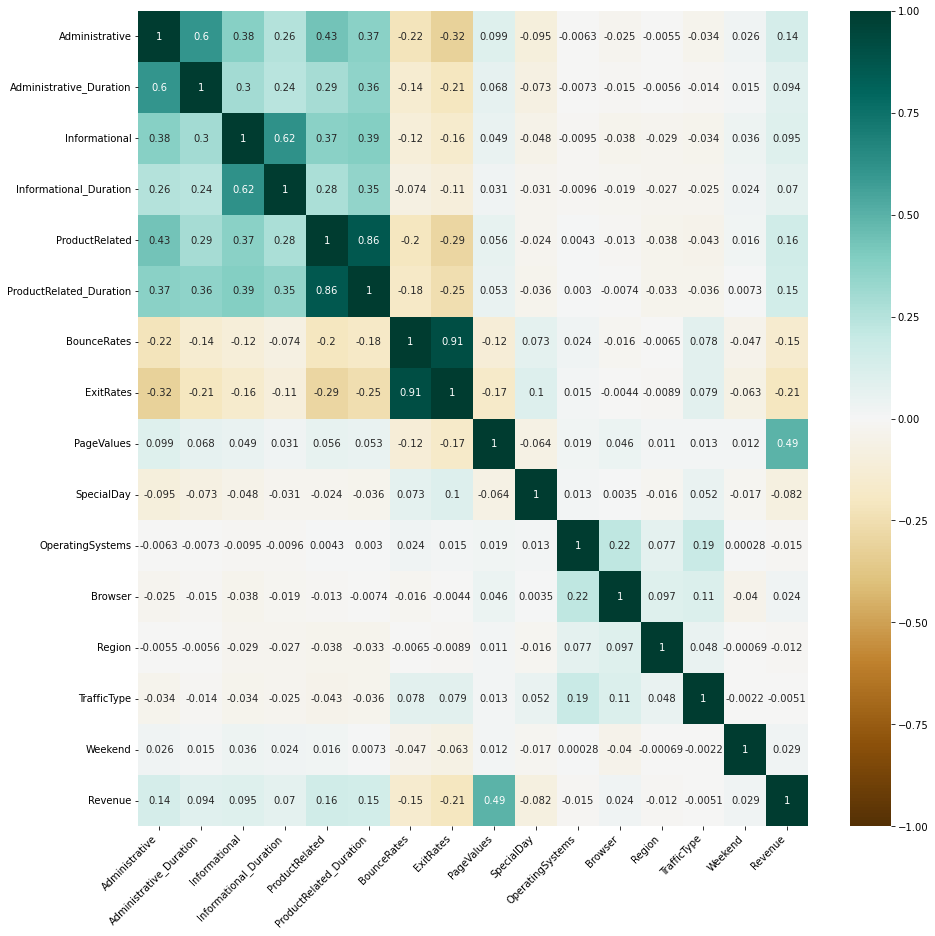

In [36]:
#plotting using seaborn heatmap
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, ax=ax, cmap='BrBG',annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                       horizontalalignment='right')
plt.show()

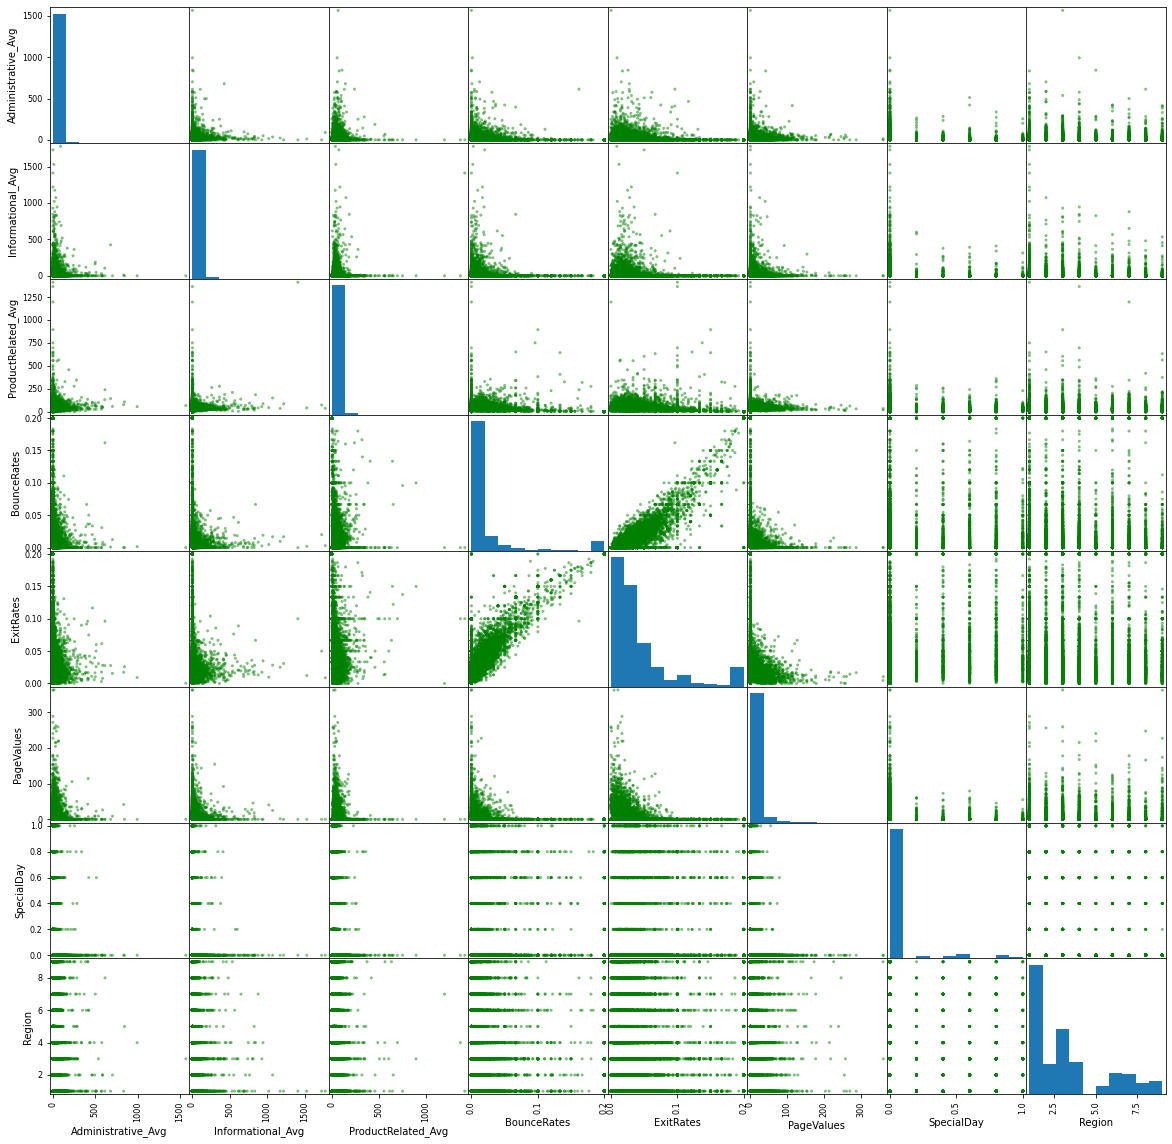

In [37]:
ecommerce_df_num=ecommerce_df_comb[['Administrative_Avg', 'Informational_Avg',
       'ProductRelated_Avg','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

#Scatter matrix plot
pd.plotting.scatter_matrix(ecommerce_df_num,c='g', figsize=(20,20))
plt.show()

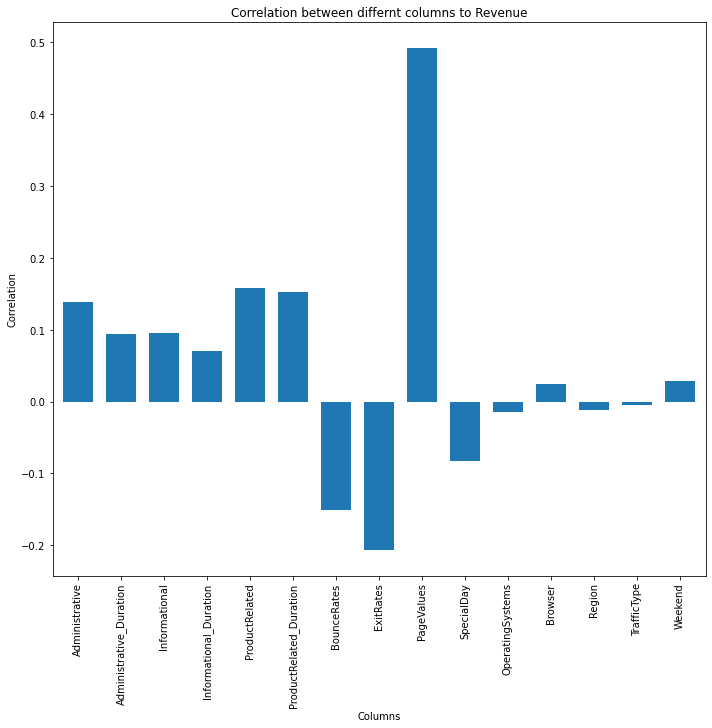

In [38]:
#dataframe of correlation of revenue to other columns before combining columns
corr_plot=ecommerce_df.copy()
corr_plot['Weekend'] = corr_plot['Weekend'].map({False:0, True:1})
corr_plot['Revenue'] = corr_plot['Revenue'].map({False:0, True:1})
corr_p=corr_plot.corr()['Revenue'][:-1]
#Bar plot of correlation 
corr_p.plot(kind="bar",width=.7,figsize=(10,10))
plt.xlabel("Columns")
plt.ylabel("Correlation")
plt.tight_layout()
plt.title("Correlation between differnt columns to Revenue")
plt.show()

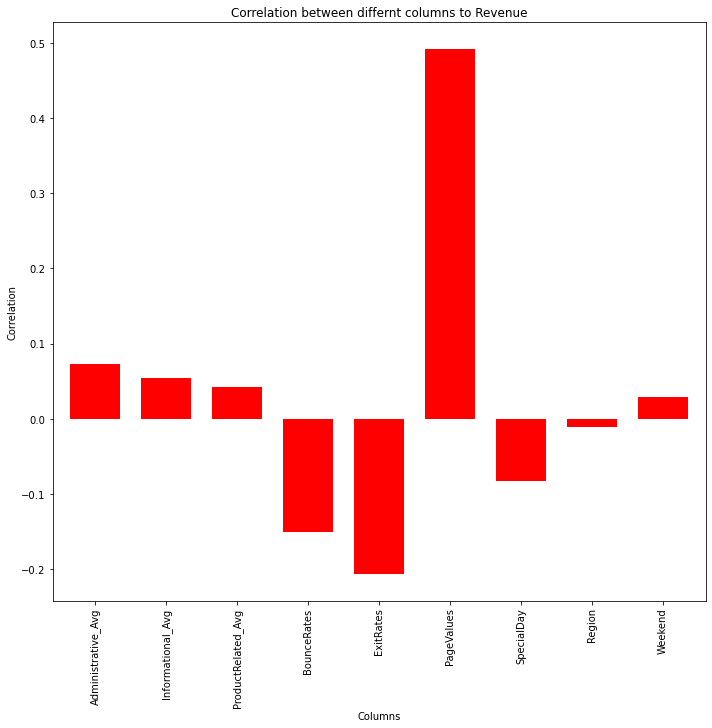

In [39]:
#dataframe of correlation of revenue to other columns after combining columns
corr_plot=ecommerce_final_df.copy()
corr_plot['Weekend'] = corr_plot['Weekend'].map({False:0, True:1})
corr_plot['Revenue'] = corr_plot['Revenue'].map({False:0, True:1})
corr_p=corr_plot.corr()['Revenue'][:-1]
#Bar plot of correlation 
corr_p.plot(kind="bar",color='r',width=.7,figsize=(10,10))
plt.xlabel("Columns")
plt.ylabel("Correlation")
plt.tight_layout()
plt.title("Correlation between differnt columns to Revenue")
plt.show()

Distribution of Revenue over SpecialDay before binning


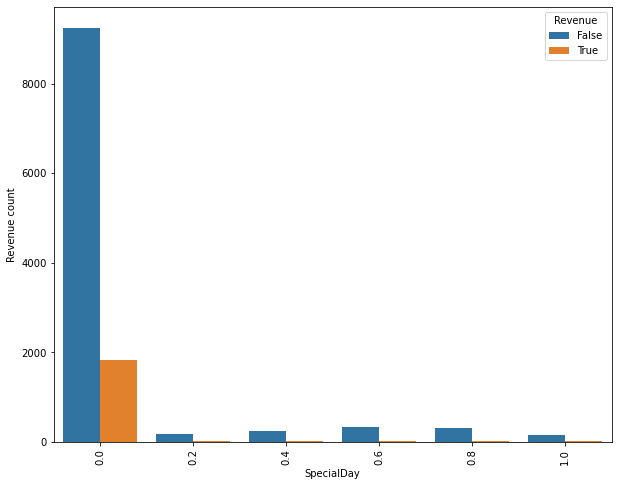

Distribution of Revenue over Month before binning


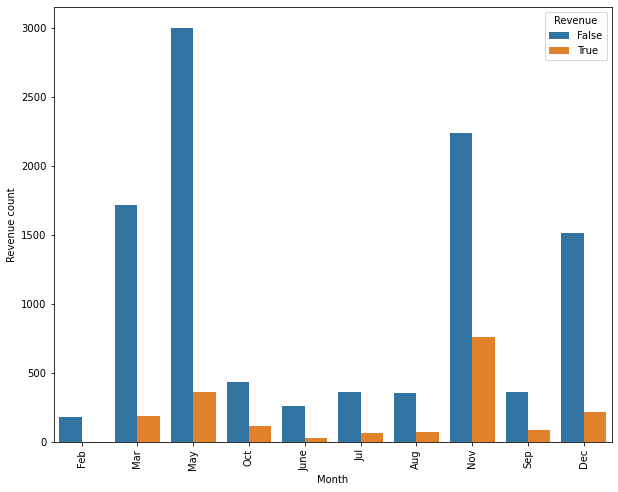

Distribution of Revenue over OperatingSystems before binning


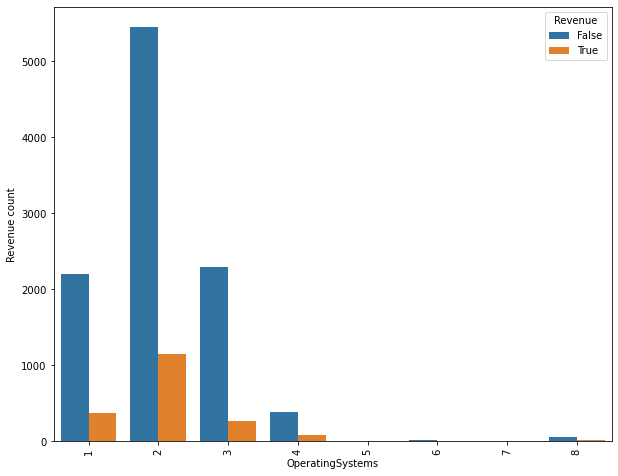

Distribution of Revenue over Browser before binning


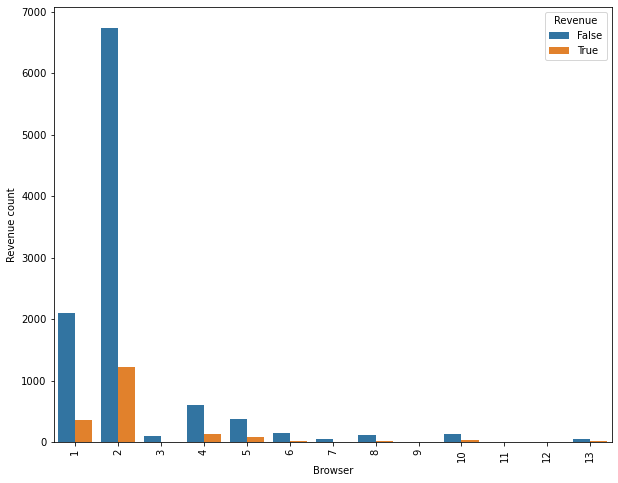

Distribution of Revenue over Region before binning


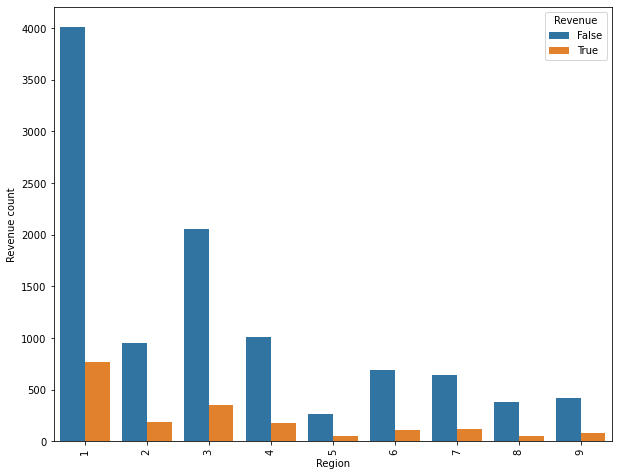

Distribution of Revenue over TrafficType before binning


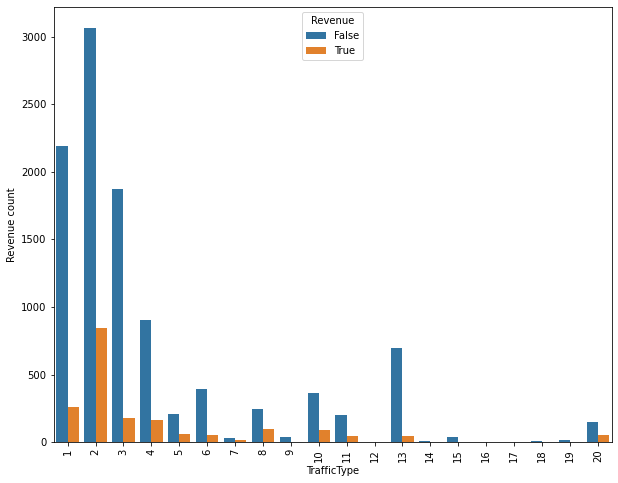

Distribution of Revenue over VisitorType before binning


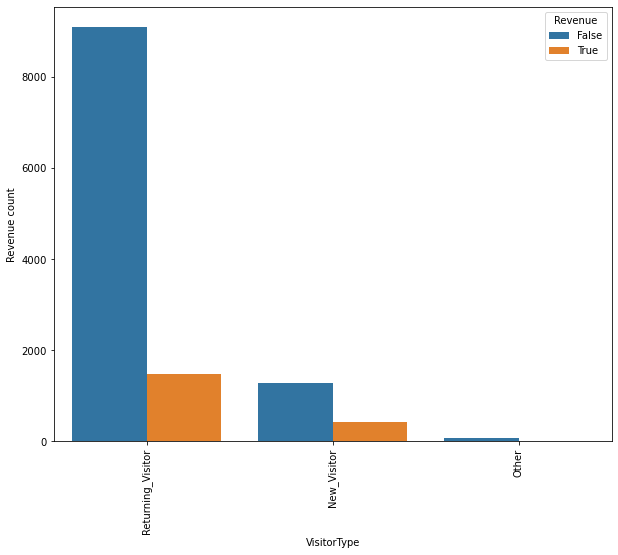

Distribution of Revenue over Weekend before binning


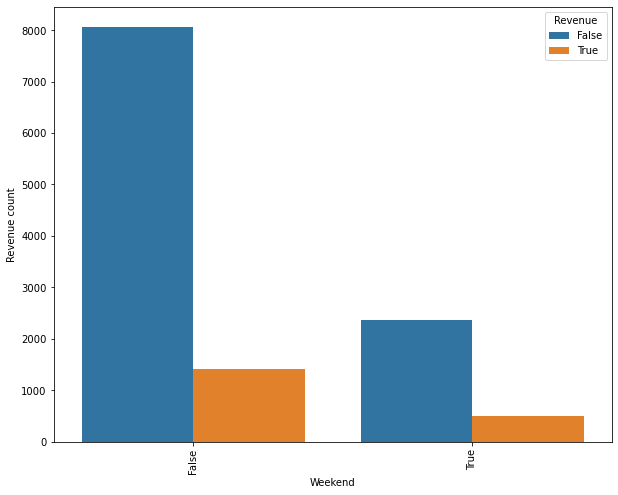

Distribution of Revenue over Revenue before binning


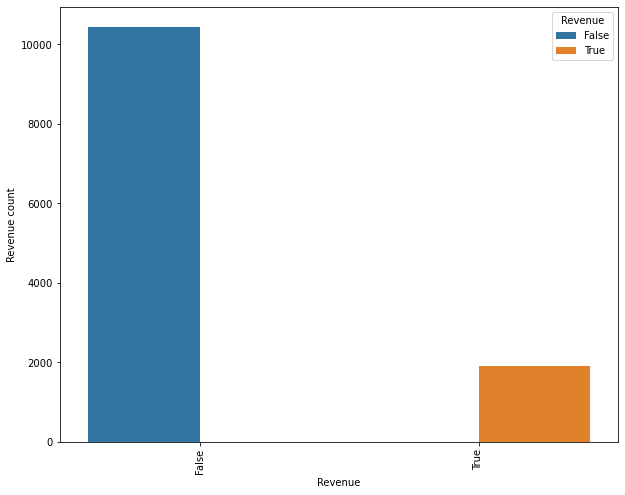

In [40]:
# plotting distribution of Revenue over other columns before binning
for cat in ecommerce_df_cat.columns:
    fig,ax=plt.subplots(figsize=(10,8))
    cat_num=ecommerce_df_cat[cat]
    chart=sns.countplot(x=cat_num, hue=ecommerce_df_cat['Revenue'],ax=ax)
    print('Distribution of Revenue over {} before binning'.format(cat))
    chart.set_ylabel("Revenue count")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Distribution of Revenue over SpecialDay after binning


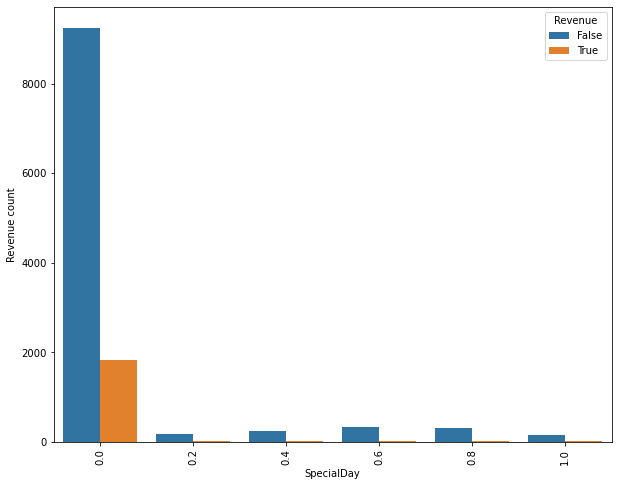

Distribution of Revenue over Month after binning


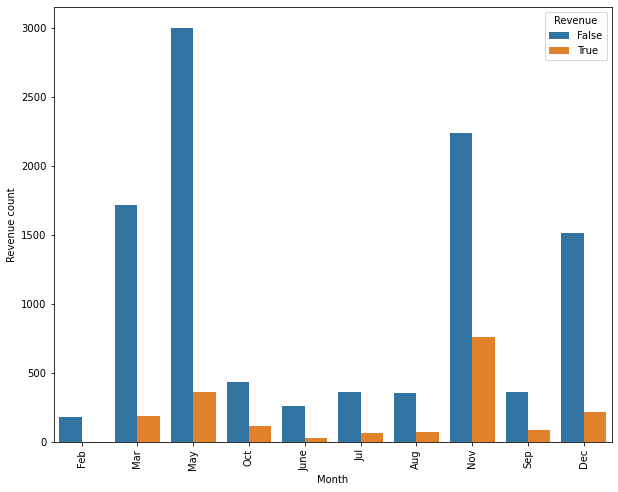

Distribution of Revenue over OperatingSystems after binning


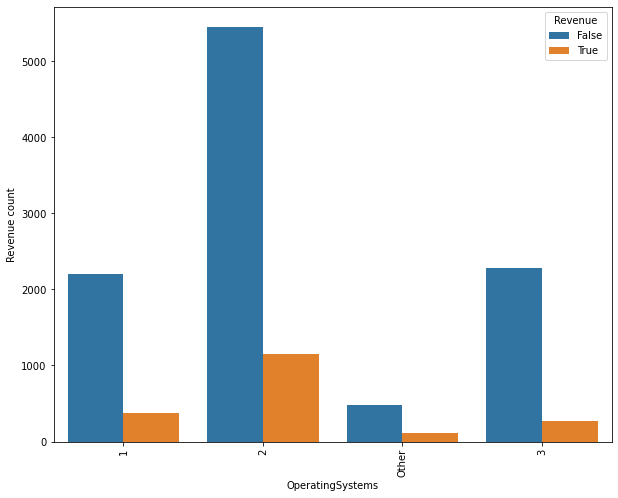

Distribution of Revenue over Browser after binning


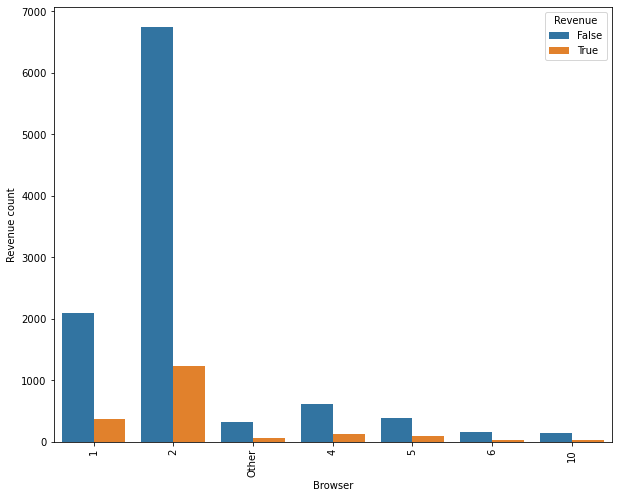

Distribution of Revenue over Region after binning


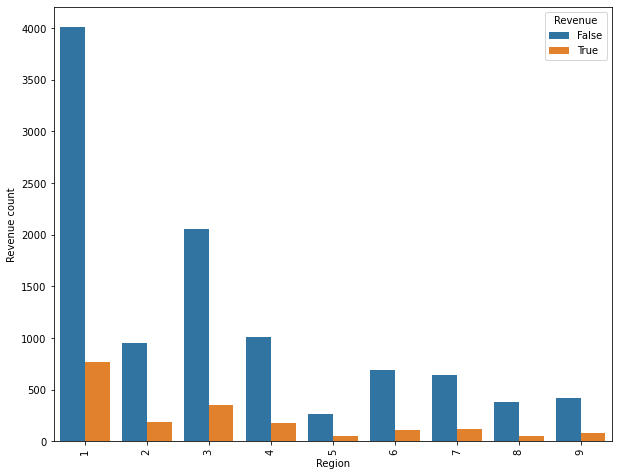

Distribution of Revenue over TrafficType after binning


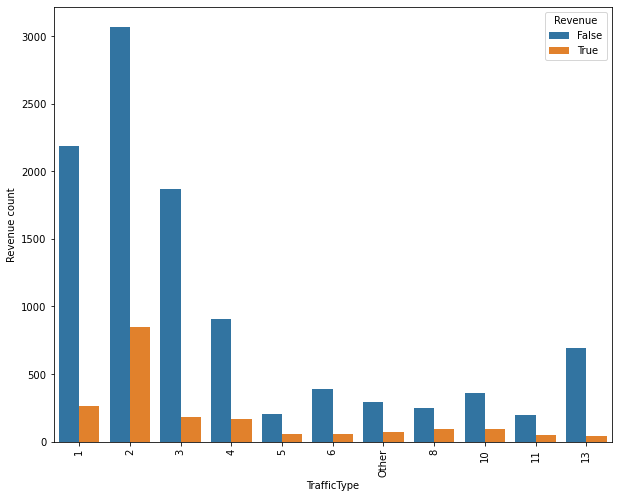

Distribution of Revenue over VisitorType after binning


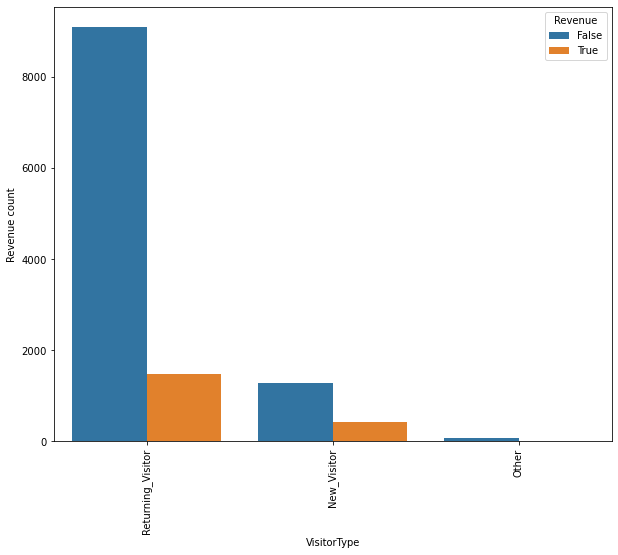

Distribution of Revenue over Weekend after binning


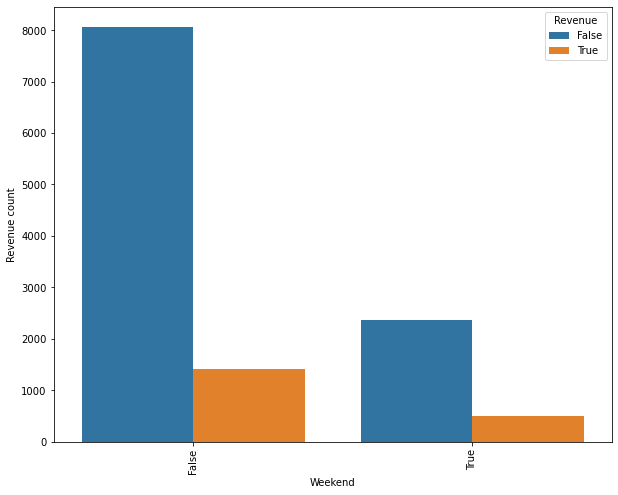

Distribution of Revenue over Revenue after binning


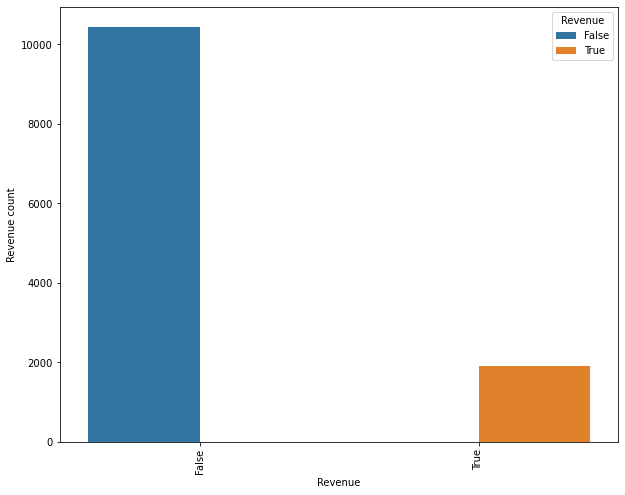

In [41]:
# plotting distribution of Revenue over other columns after binning
ecommerce_df_cat_bin=ecommerce_final_df[columns]
for cat in ecommerce_df_cat_bin.columns:
    fig,ax=plt.subplots(figsize=(10,8))
    cat_num=ecommerce_df_cat_bin[cat]
    chart=sns.countplot(x=cat_num,hue=ecommerce_df_cat_bin['Revenue'], ax=ax)
    print('Distribution of Revenue over {} after binning'.format(cat))
    chart.set_ylabel("Revenue count")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [65]:
#defing function for plotting
cols=['Administrative_Avg', 'Informational_Avg',
       'ProductRelated_Avg','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems','Month' 'Browser', 'Region', 'TrafficType' ]
#for box plot
def plots_box(col):
    for j in range(1, 7):
        fig = plt.figure(figsize=(10,60))
        ax = fig.add_subplot(6, 1, j)
        sns.boxplot(x=col, y=cols[j-1],hue='Revenue',
                data=ecommerce_final_df,  palette="Set2",ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_ylabel(f'{cols[j-1]}')
        ax.set_xlabel(f'{col}')
        ax.set_title(f'Box Plot-{col} Vs.{cols[j-1]} Vs. Revenue')
        plt.show()
        print('*'*80)
        
#for violin plot        
def plots_violin(col):
    for j in range(1, 7):
        fig = plt.figure(figsize=(10,60))
        ax = fig.add_subplot(6, 1, j)
        sns.violinplot(x=col, y=cols[j-1],hue='Revenue',
                data=ecommerce_final_df,  palette="Set2",ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_ylabel(f'{cols[j-1]}')
        ax.set_xlabel(f'{col}')
        ax.set_title(f'Violin Plot-{col} Vs.{cols[j-1]} Vs. Revenue')
        plt.show()
        print('*'*80)
        
#for strip plot
def plots_strip(col):
    for j in range(1, 7):
        fig = plt.figure(figsize=(10,60))
        ax = fig.add_subplot(6, 1, j)
        sns.stripplot(x=col, y=cols[j-1],hue='Revenue',
                data=ecommerce_final_df,  palette="Set2",ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_ylabel(f'{cols[j-1]}')
        ax.set_xlabel(f'{col}')
        ax.set_title(f'Strip Plot-{col} Vs.{cols[j-1]} Vs. Revenue')
        plt.show()
        print('*'*80)

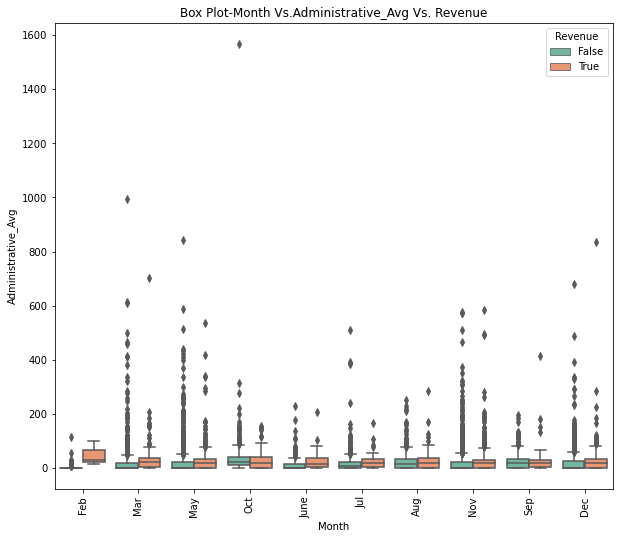

********************************************************************************


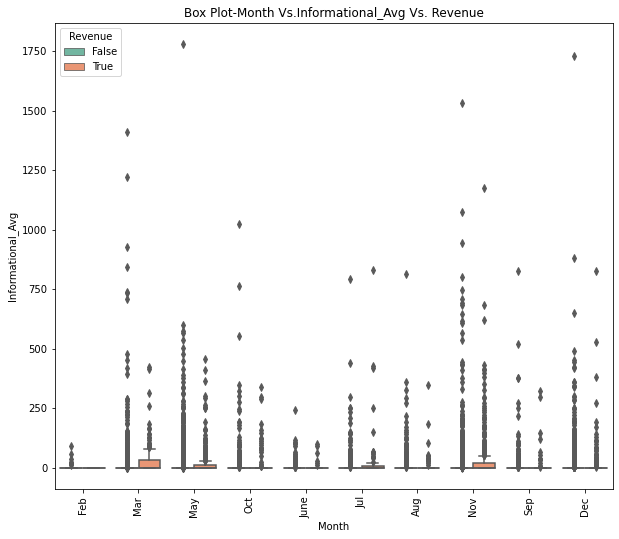

********************************************************************************


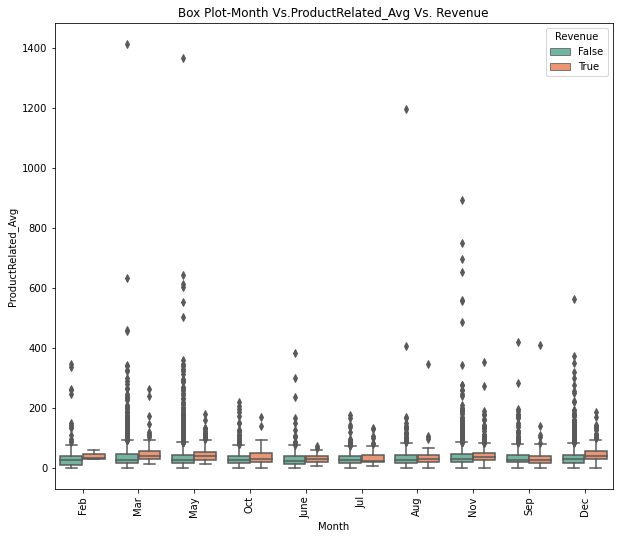

********************************************************************************


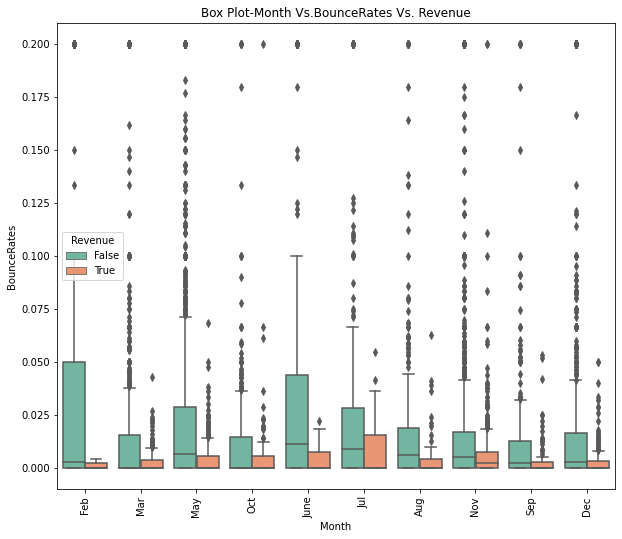

********************************************************************************


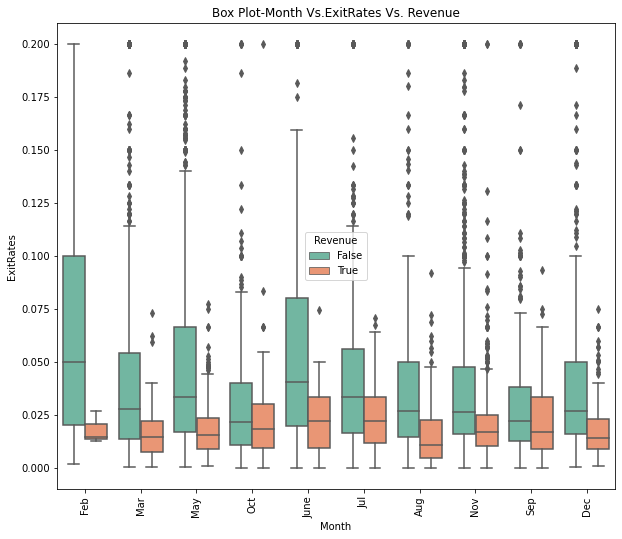

********************************************************************************


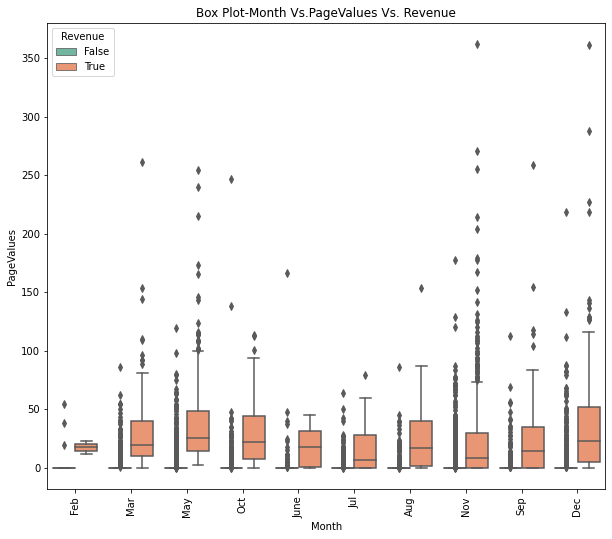

********************************************************************************


In [66]:
#month related with differnt other columns 
plots_box(col='Month')


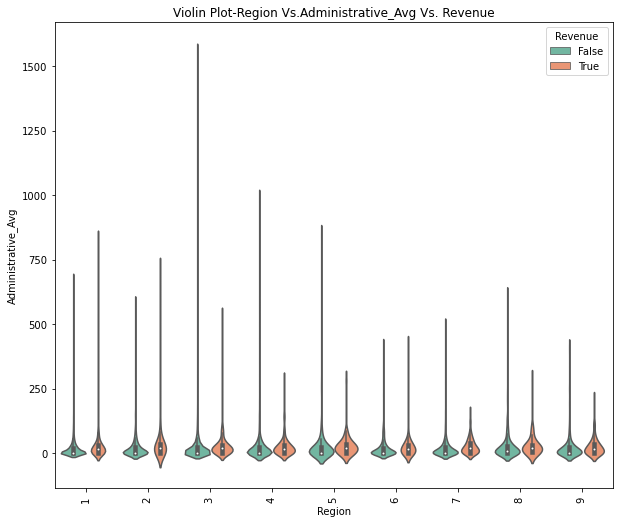

********************************************************************************


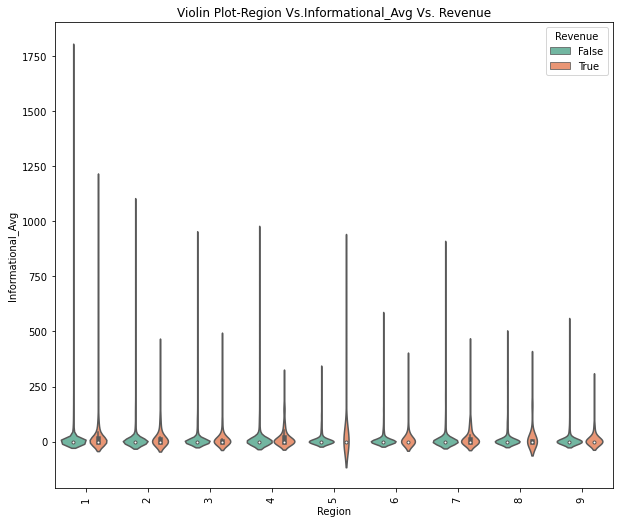

********************************************************************************


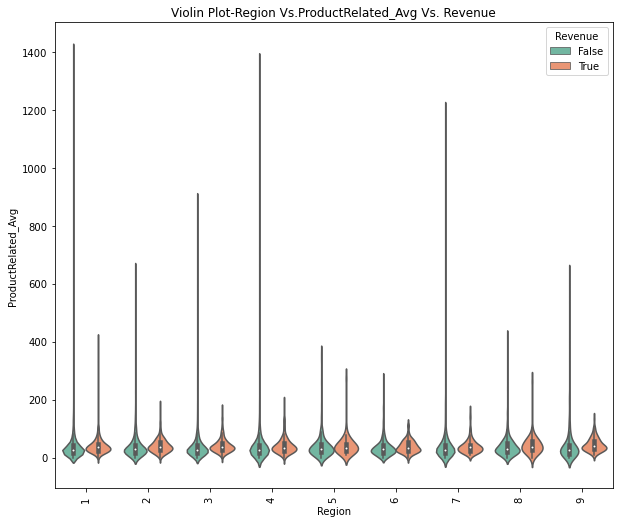

********************************************************************************


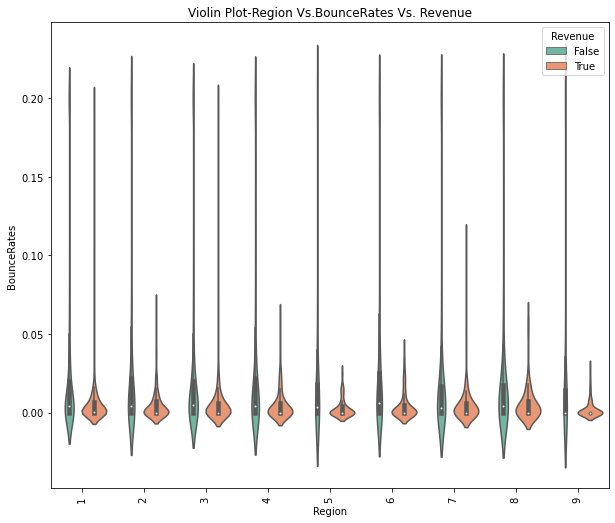

********************************************************************************


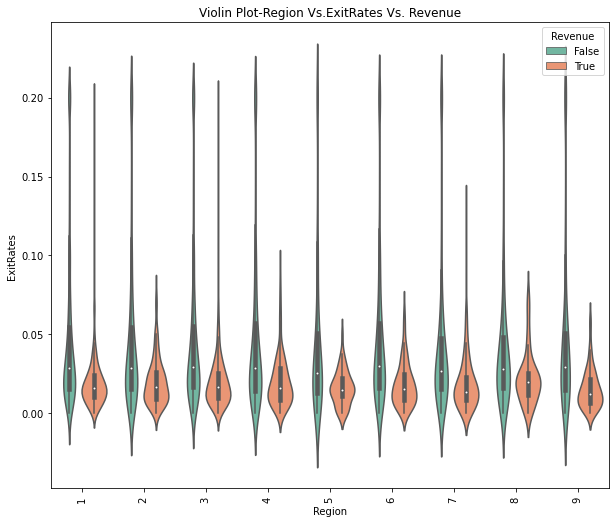

********************************************************************************


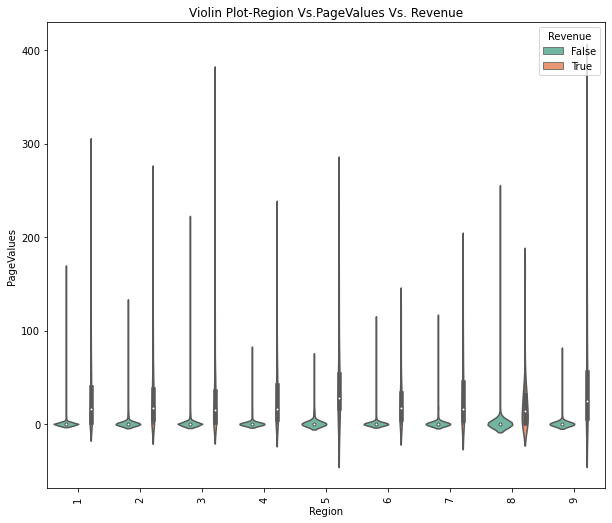

********************************************************************************


In [67]:
#month related with differnt other columns 
plots_violin(col='Region')

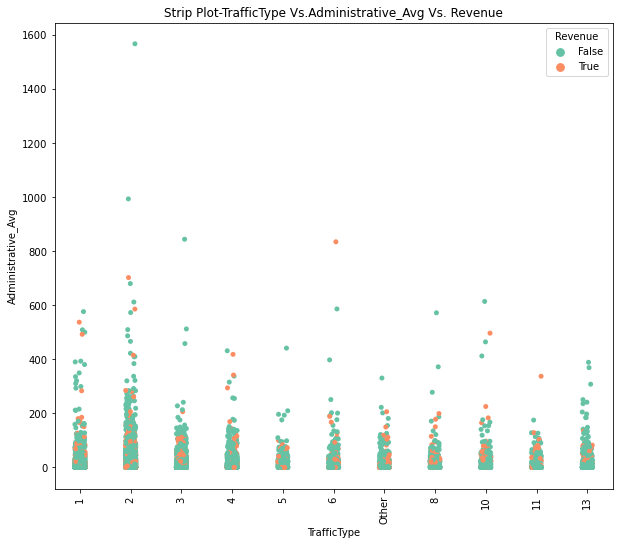

********************************************************************************


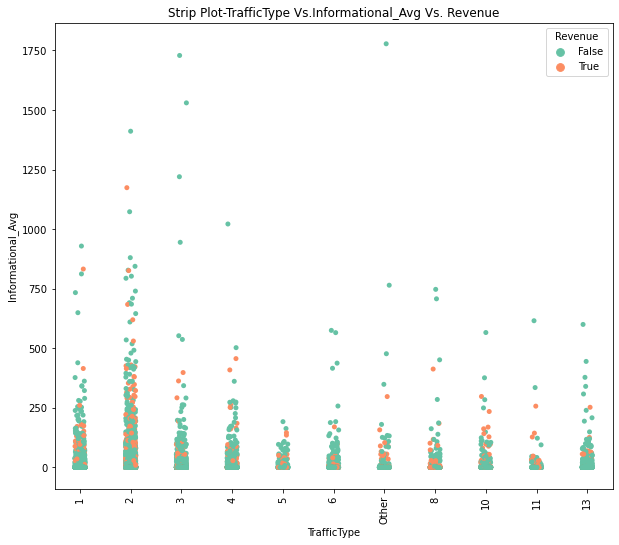

********************************************************************************


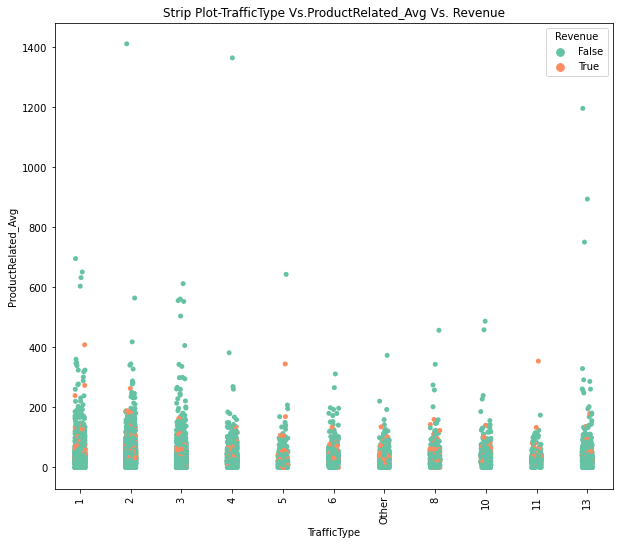

********************************************************************************


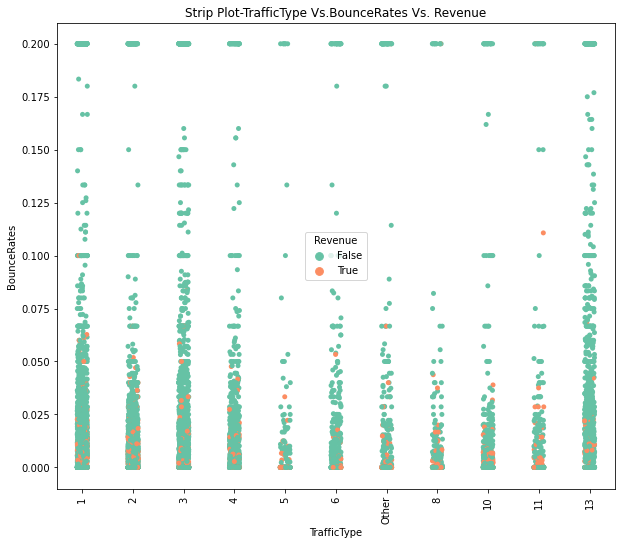

********************************************************************************


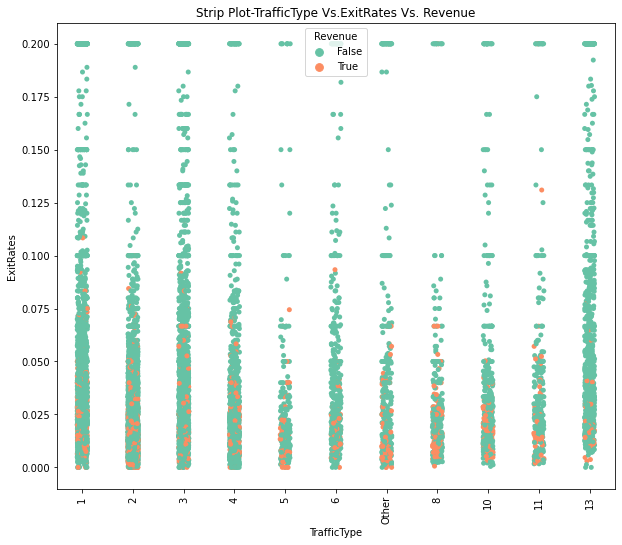

********************************************************************************


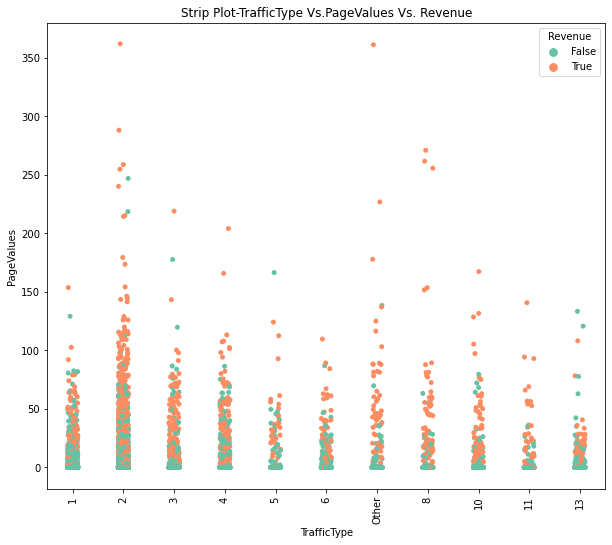

********************************************************************************


In [68]:
#month related with differnt other columns 
plots_strip(col='TrafficType')

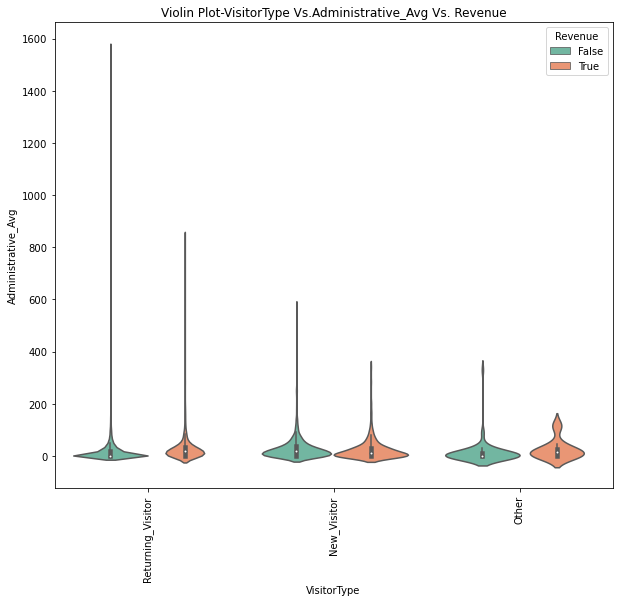

********************************************************************************


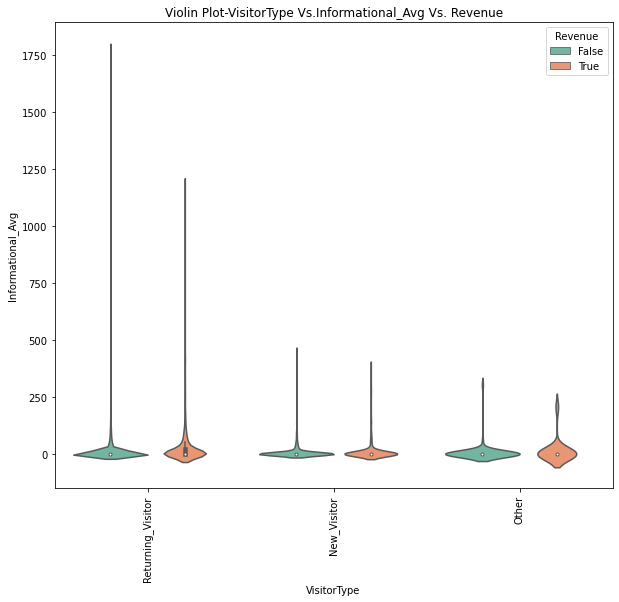

********************************************************************************


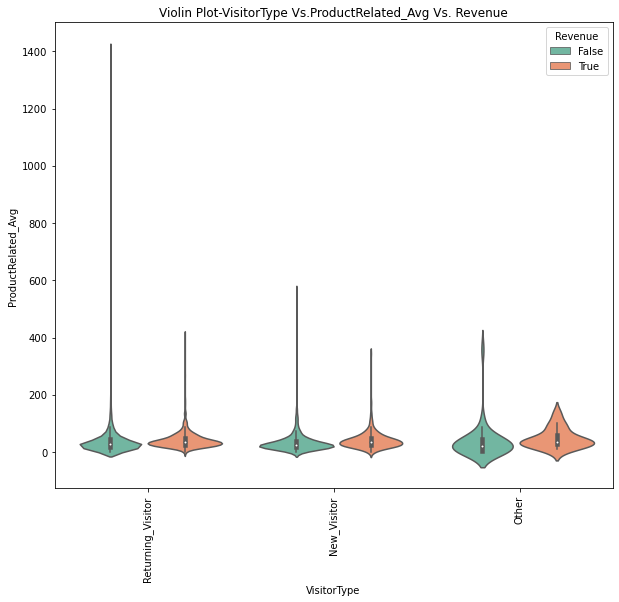

********************************************************************************


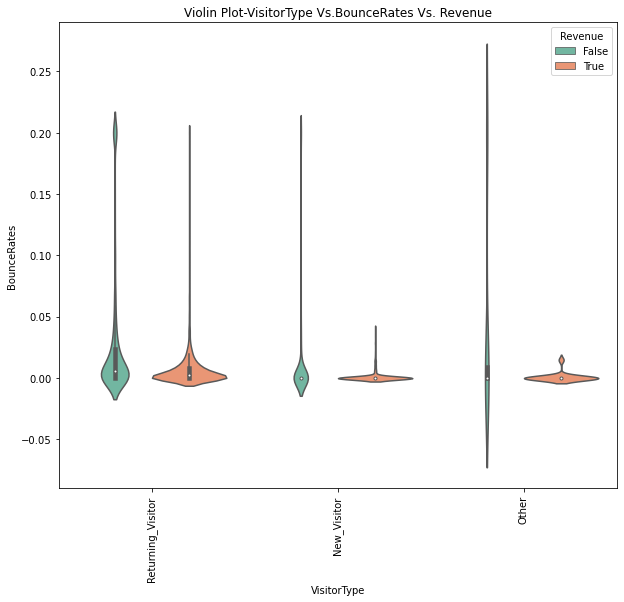

********************************************************************************


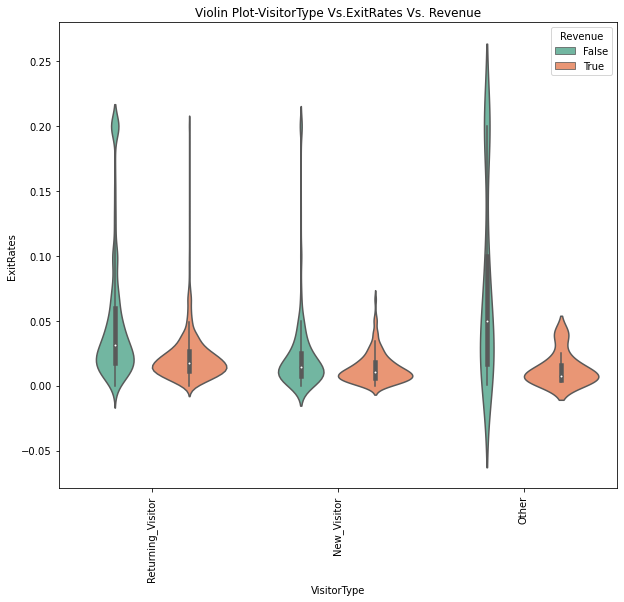

********************************************************************************


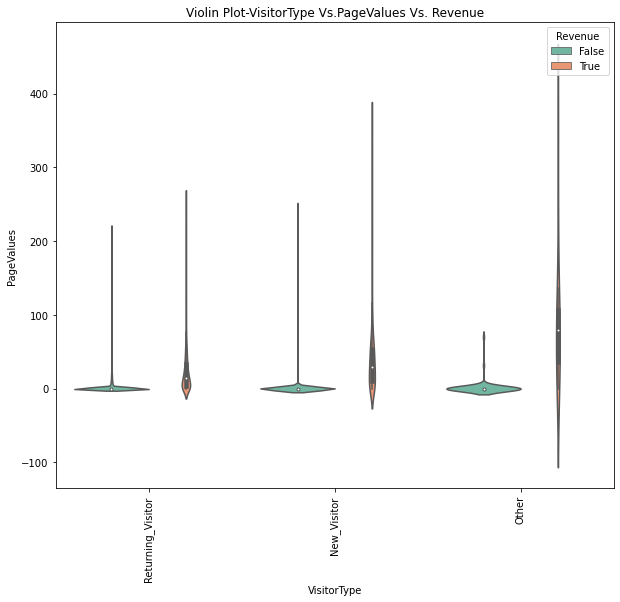

********************************************************************************


In [70]:
#month related with differnt other columns 
plots_violin(col='VisitorType')